<a href="https://colab.research.google.com/github/avinashyadav11/Play-Store-App-Review-Analysis/blob/main/Play_Store_App_Review_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. </b>

## <b> Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.</b>

## <b> Explore and analyze the data to discover key factors responsible for app engagement and success. </b>

## **Importing useful libraries**

In [2]:
#importing numpy and pandas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
play_store_data_file_path='/content/drive/MyDrive/Colab Notebooks/Alma Better/EDA/Copy of Play Store Data.csv'

In [5]:
user_reviews_file_path= '/content/drive/MyDrive/Colab Notebooks/Alma Better/EDA/Copy of User Reviews.csv'

**Loading Play store data and user reviews data into dataframe**

In [6]:
play_store_df = pd.read_csv(play_store_data_file_path) 

In [7]:
user_reviews_df= pd.read_csv(user_reviews_file_path)

Getting first five rows and last five rows of the dataframe

In [8]:
play_store_df.head() # head() gives top 5 rows by default. We can mention number of row that we want to display as argument e.g:- head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [9]:
user_reviews_df.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [10]:
play_store_df.tail() #tail() gives last 5 rows by default. We can mention number of row that we want to display as argument e.g:- tail(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


In [11]:
user_reviews_df.tail()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
64290,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64291,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64292,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64293,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64294,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN


Getting columns of Play store dataframe

In [12]:
play_store_df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

Getting count of total rows and columns in Play store dataframe

In [13]:
print(f"Play store has total:{play_store_df.shape[0]} rows")
print(f"Play store has total:{play_store_df.shape[1]} columns")

Play store has total:10841 rows
Play store has total:13 columns


In [14]:
play_store_df.describe() #describe method shows statistical summer of columns that has numeric data 

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


# **Data Cleaning**

In [15]:
play_store_df.Category.unique() #checking all values for Category column

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)

We can see that there is 1.9 in Category column that seems wrong. Lets check how many rows has what count of these each category 

In [16]:
play_store_df['Category'].value_counts() #Checking count of each category type

FAMILY                 1972
GAME                   1144
TOOLS                   843
MEDICAL                 463
BUSINESS                460
PRODUCTIVITY            424
PERSONALIZATION         392
COMMUNICATION           387
SPORTS                  384
LIFESTYLE               382
FINANCE                 366
HEALTH_AND_FITNESS      341
PHOTOGRAPHY             335
SOCIAL                  295
NEWS_AND_MAGAZINES      283
SHOPPING                260
TRAVEL_AND_LOCAL        258
DATING                  234
BOOKS_AND_REFERENCE     231
VIDEO_PLAYERS           175
EDUCATION               156
ENTERTAINMENT           149
MAPS_AND_NAVIGATION     137
FOOD_AND_DRINK          127
HOUSE_AND_HOME           88
LIBRARIES_AND_DEMO       85
AUTO_AND_VEHICLES        85
WEATHER                  82
ART_AND_DESIGN           65
EVENTS                   64
COMICS                   60
PARENTING                60
BEAUTY                   53
1.9                       1
Name: Category, dtype: int64

It looks like only one row has 1.9 as category type. Lets try to locate that row and probably drop that column if it is wrong

In [17]:
play_store_df.loc[play_store_df['Category'] == '1.9'] # Retiving row data for category that has value '1.9'. Used loc()method that is used for locating a data point with a particular data label

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


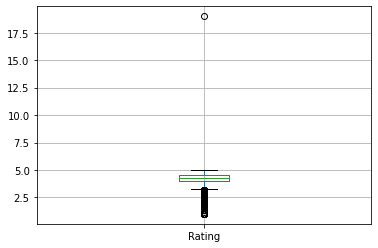

In [18]:
play_store_df.boxplot() #boxplot help to get range of a particular numric column

As we can see this row data it seems like data is not properly written in particular column 1.9 is rating for the app and 19.0 is reviews and likewise. The boxplot also show that there is outlier with 19.0 value.
We will drop this row for our data

In [19]:
play_store_df.drop(play_store_df.index[10472], inplace=True) #Dropping that particular row

Now lets check number of row 


In [20]:
play_store_df.shape #Perviously it was 10841 now it is 10840 that means row was successfully deleted

(10840, 13)

checking the data for ratings column using histogram

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f173f5d00d0>]],
      dtype=object)

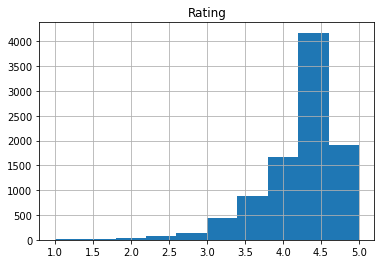

In [21]:
play_store_df.hist()

As we can see that rating is also now ranging from 1 to 5 that means out outlier was removed

In [22]:
play_store_df.info() #info() gives column and corresponding non-null counts for that column. It helps to understand how many rows have data and null 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  object 
 4   Size            10840 non-null  object 
 5   Installs        10840 non-null  object 
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.2+ MB


In [23]:
play_store_df.isnull().sum() #isnull() will show all the data and flase where there is not null and true where there is Nan or null value. using sum method will give the sum of null data in particular column

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

# **Data Manipulation**

For columns that have numerical data we will fill it with median and columns that have categorical data we will fill it with mode.

In [24]:

play_store_df['Rating'].fillna(play_store_df['Rating'].median(), inplace=True)

In [25]:
play_store_df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              1
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       8
Android Ver       2
dtype: int64

Rating columns the only numeric column with null value are handled now lets move to other columns that have categorical data and have null or nan value

In [26]:
print(play_store_df['Type'].mode()) #Printing mode value for categorical data column with null values
print(play_store_df['Current Ver'].mode())
print(play_store_df['Android Ver'].mode())

0    Free
dtype: object
0    Varies with device
dtype: object
0    4.1 and up
dtype: object


In [27]:
play_store_df['Type'].fillna(str(play_store_df['Type'].mode().values[0]),inplace=True)
play_store_df['Current Ver'].fillna(str(play_store_df['Current Ver'].mode().values[0]),inplace=True)
play_store_df['Android Ver'].fillna(str(play_store_df['Android Ver'].mode().values[0]),inplace=True)

In [28]:
play_store_df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

Now we dont have any null values in our data

We will use Price, Reviews and Installs column for visualization so lets first check type of each column

In [29]:
print(type(play_store_df['Price'][0]))
print(type(play_store_df['Reviews'][0]))
print(type(play_store_df['Installs'][0]))

<class 'str'>
<class 'str'>
<class 'str'>


All are string we will need to convert it into numeric

In [30]:
play_store_df['Installs'] = play_store_df['Installs'].map(lambda x: x.rstrip('+')) # rstrip help to remove all the characters that are specified in argument

In [31]:
type(play_store_df['Installs'][1]) #checking the type of Installs columns values

str

In [32]:
play_store_df['Installs'] = play_store_df['Installs'].apply(lambda x: str(x).replace(',','') if ',' in str(x) else str(x)) 
play_store_df['Installs'] = play_store_df['Installs'].apply(lambda x: str(x).replace('+','') if '+' in str(x) else str(x)) 
play_store_df['Installs'] = play_store_df['Installs'].apply(lambda x: float(x))

In [33]:
play_store_df['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

In [34]:
play_store_df['Price'] = pd.to_numeric(play_store_df['Price'].str.replace('$','')) #Removing '$' and coverting price from string to number

In [35]:
play_store_df['Reviews'] = pd.to_numeric(play_store_df['Reviews']) 

In [36]:
play_store_df.describe()

,Rating,Reviews,Installs,Price
count,10840.000000,1.084000e+04,1.084000e+04,10840.000000
mean,4.206476,4.441529e+05,1.546434e+07,1.027368
std,0.480342,2.927761e+06,8.502936e+07,15.949703
min,1.000000,0.000000e+00,0.000000e+00,0.000000
25%,4.100000,3.800000e+01,1.000000e+03,0.000000
50%,4.300000,2.094000e+03,1.000000e+05,0.000000
75%,4.500000,5.477550e+04,5.000000e+06,0.000000
max,5.000000,7.815831e+07,1.000000e+09,400.000000


As we can see all the three column are converted in to numeric now

In [37]:
play_store_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          10840 non-null  float64
 3   Reviews         10840 non-null  int64  
 4   Size            10840 non-null  object 
 5   Installs        10840 non-null  float64
 6   Type            10840 non-null  object 
 7   Price           10840 non-null  float64
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10840 non-null  object 
 12  Android Ver     10840 non-null  object 
dtypes: float64(3), int64(1), object(9)
memory usage: 1.5+ MB


In [38]:
boolean = play_store_df['App'].duplicated().any()
boolean

True

In [39]:
play_store_df['App'].value_counts()

ROBLOX                                               9
CBS Sports App - Scores, News, Stats & Watch Live    8
ESPN                                                 7
Duolingo: Learn Languages Free                       7
Candy Crush Saga                                     7
                                                    ..
Mega Photo                                           1
myQ                                                  1
BD Briight: Your Diabetes Personal Assistant         1
AP Government Review                                 1
BV Link                                              1
Name: App, Length: 9659, dtype: int64

In [40]:
play_store_df[play_store_df['App']=='ESPN']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2959,ESPN,SPORTS,4.2,521138,Varies with device,10000000.0,Free,0.0,Everyone 10+,Sports,"July 19, 2018",Varies with device,5.0 and up
3010,ESPN,SPORTS,4.2,521138,Varies with device,10000000.0,Free,0.0,Everyone 10+,Sports,"July 19, 2018",Varies with device,5.0 and up
3018,ESPN,SPORTS,4.2,521138,Varies with device,10000000.0,Free,0.0,Everyone 10+,Sports,"July 19, 2018",Varies with device,5.0 and up
3048,ESPN,SPORTS,4.2,521140,Varies with device,10000000.0,Free,0.0,Everyone 10+,Sports,"July 19, 2018",Varies with device,5.0 and up
3060,ESPN,SPORTS,4.2,521140,Varies with device,10000000.0,Free,0.0,Everyone 10+,Sports,"July 19, 2018",Varies with device,5.0 and up
3072,ESPN,SPORTS,4.2,521140,Varies with device,10000000.0,Free,0.0,Everyone 10+,Sports,"July 19, 2018",Varies with device,5.0 and up
4069,ESPN,SPORTS,4.2,521081,Varies with device,10000000.0,Free,0.0,Everyone 10+,Sports,"July 19, 2018",Varies with device,5.0 and up


In [41]:
play_store_df['App'].value_counts()

ROBLOX                                               9
CBS Sports App - Scores, News, Stats & Watch Live    8
ESPN                                                 7
Duolingo: Learn Languages Free                       7
Candy Crush Saga                                     7
                                                    ..
Mega Photo                                           1
myQ                                                  1
BD Briight: Your Diabetes Personal Assistant         1
AP Government Review                                 1
BV Link                                              1
Name: App, Length: 9659, dtype: int64

In [42]:
play_store_df.shape

(10840, 13)

In [43]:
#play_store_df.drop_duplicates(inplace=True)

play_store_df.drop_duplicates(subset ='App',keep = False, inplace = True)


In [44]:
play_store_df['App'].value_counts()

CV Samples 2018                                1
Manga - read Thai translation                  1
Five Nights at Neighbor House                  1
Scratch Logo Quiz. Challenging brain puzzle    1
Public Digital Library                         1
                                              ..
AI with Python Tutorial                        1
Funny Jokes                                    1
Learn SAP BW                                   1
4-T's Bar-BQ & Catering                        1
BV Link                                        1
Name: App, Length: 8861, dtype: int64

In [45]:
boolean = play_store_df['App'].duplicated().any()
boolean

False

In [46]:
play_store_df['Reviews'].unique()

array([   159,  87510, 215644, ...,    603,   1195, 398307])

In [47]:
sns.set_style('darkgrid')
plt.rcParams['font.size'] = 14
plt.rcParams['figure.figsize'] = (9, 5)
plt.rcParams['figure.facecolor'] = '#00000000'

In [48]:
#top_genres = play_store_data_df.Genres.value_counts().reset_index().rename(columns={'Genres':'Count','index':'Genres'})

NameError: ignored

In [ ]:
#genres_installs = play_store_data_df.groupby(['Genres'])[['Installs']].sum()

In [ ]:
#top_genres_installs = pd.merge(top_genres, genres_installs, on='Genres')
#top_20_genres_installs = top_genres_installs.head(20)

In [ ]:
# plt.figure(figsize=(14,7))
# plt.xticks(rotation=65)
# plt.xlabel("Genres")
# plt.ylabel("Number of application")
# plt.title("Top 20 Genres")
# sns.barplot(top_20_genres_installs.Genres, top_20_genres_installs.Count)
# plt.show()